In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from matlab_functions import stencil2prec, parula_map
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sksparse.cholmod import cholesky as cholesky_sparse
from scipy.sparse.linalg import spsolve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#kappa adjusts the correlation to neighbouring pixels.
#the higher the kappa the higer is the contribution
#from its own mean, the lower the more the pixel
#is affected by the values of the neighbouring pixels.
#Thus, since the neighbouring pixels are correlated
#by their neighbours, the correlation traverserses the image
#like a wave.
kappa = 0.8
m = 100
# q represents a stencil for a precision matrix Q where
#a pixel ij is only affected by its 4 neighbours with sharing sides.
#Since the neighbours have values of -1 they all contribute the same
#to the concerned pixel

q1 = kappa**2 * np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]) + np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
q2 = np.array([[-10, -0.1, 0], [-0.1, 20.4+kappa**2, -0.1], [0, -0.1, -10]])
q3 = np.array([[0, -1, -10], [-1, 24+kappa**2, -1], [-10, -1, 0]])
q4 = np.array([[-1, -5, -1], [-5, 24+kappa**2, -5], [-1, -5, -1]])
q5 = q2 + q3
# stencil2prec returns a sparse matrix

Q = stencil2prec([m, m], q4)
# multiply together Q to get a broader neighbourhood influence.
Q = Q @ Q

# covariance between the middle pixel and all other pixels:
v = np.zeros(m**2)
v[m**2//2 - 550] = 1

c = spsolve(Q, v)

In [4]:
# Simulation
# chol(Q) performs minimum reordering of the sparse matrix Q via the amd
# function automatically and returns the permutation preordering in P. I
# flag is zero then Q is symmetric positive definite (SPD) and R is an
# upper triangular matrix satisfying R'*R = P'*S*P

factor = cholesky_sparse(Q)

v = np.zeros(m**2)
v[round(m**2/2) - 595] = 1
x = factor(np.random.randn(m**2))

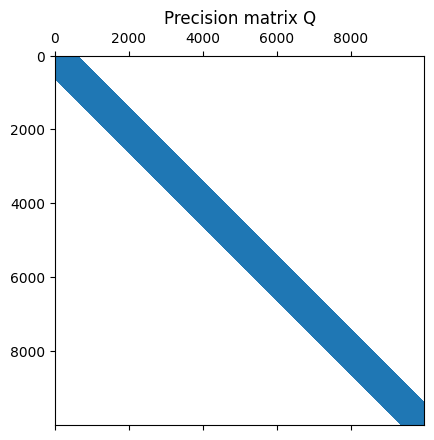

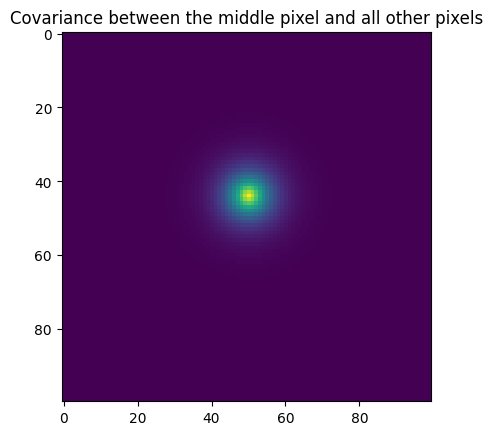

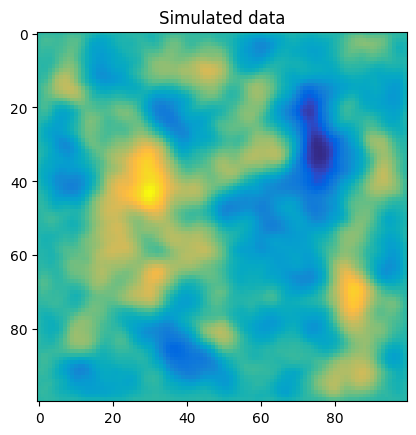

In [5]:

plt.spy(Q)
plt.title("Precision matrix Q")
plt.show()

plt.imshow(c.reshape([m, m]))
plt.title("Covariance between the middle pixel and all other pixels")
plt.show()

plt.imshow(x.reshape([m, m]), cmap=parula_map)
plt.title("Simulated data")
plt.show()

In [6]:

N = 200
ind = np.random.permutation(m**2)
ind_obs = ind[:N]
ind_mis = ind[N:]
x_obs = x[ind_obs]
x_mis = x[ind_mis]

Q_m = Q[ind_mis, :][:, ind_mis]
Q_mo = Q[ind_mis, :][:, ind_obs]

mu_m = 0
mu_o = 0
mu_m_o = 0 - spsolve(Q_m, Q_mo @ (x_obs - mu_o))

x_rec = np.zeros(m**2)
x_rec[ind_obs] = x_obs
x_rec[ind_mis] = mu_m_o

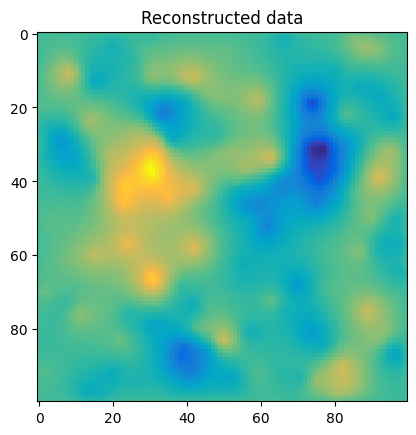

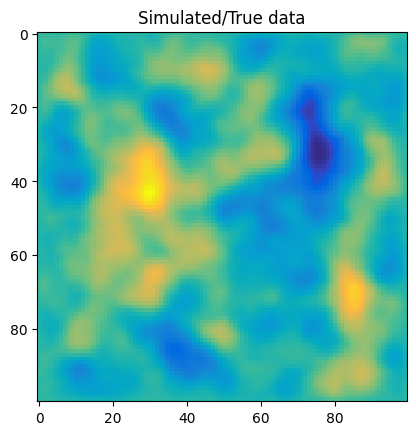

In [7]:


plt.imshow(x_rec.reshape([m, m]), cmap=parula_map)
plt.title("Reconstructed data")
plt.show()

plt.imshow(x.reshape([m, m]), cmap=parula_map)
plt.title("Simulated/True data")
plt.show()